# PETE/NUEN 689 - MOR - Fall 2023

#  Introduction to PDE's discetizations - Part 1
## Roots of Equations

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
#from tabulate import tabulate
from scipy import optimize
import math

## Model Problem

f_1 (x)=exp⁡(x)-3; initial bracket [0.5, 2] and initial guess x0 = 0;
f_2 (x)=exp⁡(-x)-x; initial bracket [0.5, 2] and initial guess x0 = 0;
f_3 (x)= x^3+4x^2-10; root is between x=1 and x=1.5


In [6]:
# Set the case to work with
case = 3
if case == 1:
    #initial bracket [0.5, 2] and initial guess x0 = 0;
    xl = 0.5
    xu = 2
    x0 = 0
    xii = 0.5
    def f(x):
        return np.exp(x) - 3
    def df(x):
        return np.exp(x)
    def func_g(x):
        return x + np.exp(x) - 3
        
elif case == 2:
    #initial bracket [0.5, 2] and initial guess x0 = 0;
    xl = -0.5
    xu = 1.5
    x0 = 0
    xii = 0.5
    def f(x):
        return np.exp(-x) - x 
    def df(x):
        return -np.exp(x) - 1
    def func_g(x):
        return np.exp(x)
else:
    #root is between x=1 and x=1.5  and x0 = 1;
    xl = 1.0
    xu = 1.5
    x0 = 1.0
    xii = 1.5
    def f(x):
        return x**3 + 4*x**2 - 10 
    def df(x):
        return 3*x**2 + 8*x
    def func_g(x):
        return math.sqrt(10 - x**3)/2

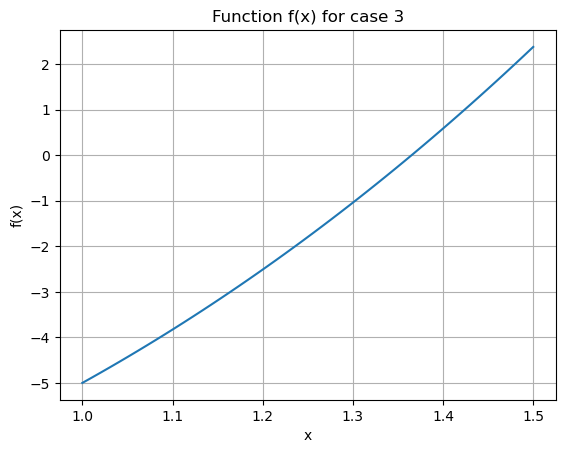

In [7]:
# Plot functions in the interval provided
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
        
x = np.linspace(xl, xu) 
plt.plot(x, f(x))
plt.title("Function f(x) for case {}".format(case))
plt.ylabel("f(x)")
plt.xlabel("x")
plt.grid()


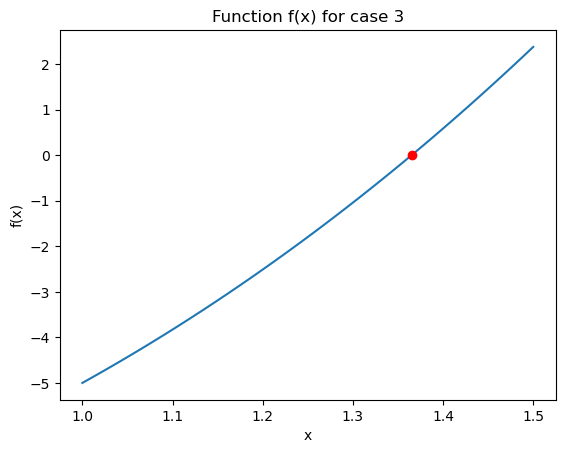

In [23]:
# Compute roots based on built-in functions
# xr_true  = np.log(3)   for case 1
root = optimize.bisect(f, xl, xu)
plt.plot(x, f(x))
plt.title("Function f(x) for case {}".format(case))
plt.ylabel("f(x)")
plt.xlabel("x")
plt.plot(root, 0, 'ro')
root1 = optimize.newton(f, x0)
root2 = optimize.newton(f, x0, df)
plt.show()

x_true = root2

## Define all root finding functions

### 1) Bisection ALgorithm

In [9]:
def My_bisect(func, xl, xu, es = 1e-7,  maxit = 30):
    
    '''
    Input:
        func = main function we want to compute the roots
        xl = lower bound --> guess
        xu = upper bound --> guess
        es = relative error --> tolerance specified (default = 1e-7)
        maxiter = maximum number of iterations (default = 30)
    Output:
        xr = root estimate
        f_xr = function value at the root estimated (should be close to zero)
        ea = actual relative error (approximation errro)
        n_iter = number if iterations
        or 
        error message if initail guess [xl, xu] is not good --> does not bracket the solution
    '''
    if func(xl) * func(xu) > 0:
        return 'Initial guess [xl, xu] does not bracket the solution - so sign changes! Pick another initial guess'
    #Initialize variables
    n_iter = 0; xr = xl; ea = 100;
    Ea = np.array([])
    Xr = np.array([])
    Fx = np.array([])
    
    while 1:
        xr_old = xr
        xr = (xl + xu)/2
        Xr = np.append(Xr, xr)
        Fx = np.append(Fx, abs(func(xr)))
        
        if xr != 0: 
            ea = abs((xr - xr_old)/xr) * 100;
            Ea = np.append(Ea, ea) 
        test = func(xl) * func(xr);        
        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
        else: 
            ea = 0
        if ea <= es or n_iter >= maxit: break
        n_iter += 1
    return xr, func(xr), ea, n_iter, Ea, Xr, Fx


In [10]:
(xr_Bi, fx_Bi, ea_Bi, n_iter_Bi, Ea_Bi, Xr_Bi, Fx_Bi) = My_bisect(f, xl, xu) 

In [11]:
print('Bisection')
print ('{0:.0s} {1:18s} {2:18s} {3:18s}'.format('Iter' ,'Approx Error', 'Approx root', 'Function at root')) 
for i in range(n_iter_Bi):
    print('{0:.0f} {1:16.12f} {2:18.16f} {3:18.16f}'.format(i, Ea_Bi[i], Xr_Bi[i], Fx_Bi[i]))  
print()
print()

Bisection
 Approx Error       Approx root        Function at root  
0  20.000000000000 1.2500000000000000 1.7968750000000000
1   9.090909090909 1.3750000000000000 0.1621093750000000
2   4.761904761905 1.3125000000000000 0.8483886718750000
3   2.325581395349 1.3437500000000000 0.3509826660156250
4   1.149425287356 1.3593750000000000 0.0964088439941406
5   0.571428571429 1.3671875000000000 0.0323557853698730
6   0.286532951289 1.3632812500000000 0.0321499705314636
7   0.143061516452 1.3652343750000000 0.0000720247626305
8   0.071581961346 1.3642578125000000 0.0160466907545924
9   0.035778175313 1.3647460937500000 0.0079892628127709
10   0.017885888034 1.3649902343750000 0.0039591015229234
11   0.008942144326 1.3651123046875000 0.0019436590100668
12   0.004470872267 1.3651733398437500 0.0009358472818803
13   0.002235386163 1.3652038574218750 0.0004319187992508
14   0.001117680589 1.3652191162109375 0.0001799489032273
15   0.000558837172 1.3652267456054688 0.0000539625415286
16   0.0002794

### 2) False Position  Algorithm

In [17]:
def My_FalsePosit(func, xl, xu, es = 1e-7,  maxit = 30):
    
    '''
    Input:
        func = main function we want to compute the roots
        xl = lower bound --> guess
        xu = upper bound --> guess
        es = relative error --> tolerance specified (default = 1e-7)
        maxiter = maximum number of iterations (default = 30)
    Output:
        xr = root estimate
        f_xr = function value at the root estimated (should be close to zero)
        ea = actual relative error (approximation errro)
        n_iter = number if iterations
        or 
        error message if initail guess [xl, xu] is not good --> does not bracket the solution
    '''
    if func(xl) * func(xu) > 0:
        return 'Initial guess [xl, xu] does not bracket the solution - so sign changes! Pick another initial guess'
    #Initialize variables
    n_iter = 0; xr = xl; ea = 100;
    Ea = np.array([])
    Xr = np.array([])
    Fx = np.array([])
    
    while 1:
        xr_old = xr
        # xr = (xl + xu)/2
        xr = xu - (func(xu)*(xl-xu))/(func(xl)-func(xu))
        Xr = np.append(Xr, xr)
        Fx = np.append(Fx, abs(func(xr)))
        
        if xr != 0: 
            ea = abs((xr - xr_old)/xr) * 100;
            Ea = np.append(Ea, ea) 
        test = func(xl) * func(xr);        
        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
        else: 
            ea = 0
        if ea <= es or n_iter >= maxit: break
        n_iter += 1
    return xr, func(xr), ea, n_iter, Ea, Xr, Fx

In [18]:
(xr_FP, fx_FP, ea_FP, n_iter_FP, Ea_FP, Xr_FP, Fx_FP) = My_FalsePosit(f, xl, xu) 

### 3) Newton Raphson Algorithm

In [16]:
def My_NewtonRaphson(func, dfunc, xr, es =  1e-7, maxiter = 30):
    
    '''

    Input:
        f = name of the function
        df
        x0
        es = 
        maxiter
    Output:
        x
        f(x)
        ea
        n_iter

    '''
    
    n_iter = 0
    Ea = np.array([])
    Xr = np.array([])
    Fx = np.array([])

    while (1):
        xr_old = xr;
        xr = xr - func(xr)/dfunc(xr);
        Xr = np.append(Xr, xr)
        Fx = np.append(Fx, abs(func(xr)))
        n_iter +=  1
        if xr != 0:
            ea = abs((xr - xr_old)/xr) * 100
            Ea = np.append(Ea, ea) 
        if ea <= es or  n_iter >= maxiter:  break
    return xr, func(xr), ea, n_iter, Ea, Xr, Fx

In [19]:
(xr_NR, fx_NR, ea_NR, n_iter_NR, Ea_NR, Xr_NR, Fx_NR) = My_NewtonRaphson(f, df, x0)

### 4) Secant  Algorithm

In [15]:
def My_Secant(func, dfunc, xr_i, xr_ii, es =  1e-7, maxiter = 30):
    
    '''

    Input:
        f = name of the function
        df
        x0
        es = 
        maxiter
    Output:
        x
        f(x)
        ea
        n_iter

    '''
    
    n_iter = 0
    Ea = np.array([])
    Xr = np.array([])
    Fx = np.array([])

    while (1):
        xr_old = xr_i
        # recall finite differnces --> here ii refers to (i-1)
        # df = (f(x_i) - f(x_ii))/(x_i - x_ii)
        # thus x_i+1 = x_i - (f(x_i)(x_i - x_ii)) / (f(x_i)- f(x_ii)) 
        #x2 = x0 - (x1-x0)*f(x0)/( f(x1) - f(x0) ) 
        #xr = xr_i - (xr_ii-xr_i)*f(xr_i)/( f(xr_ii) - f(xr_i) )  
        
        xr = xr_i - (func(xr_i)*(xr_i-xr_ii))/(func(xr_i)-func(xr_ii))
        xr_ii = xr_i
        xr_i = xr
                   
        Xr = np.append(Xr, xr)
        Fx = np.append(Fx, abs(func(xr)))
        n_iter +=  1

        if xr != 0:
            ea = abs((xr - xr_old)/xr) * 100
            Ea = np.append(Ea, ea) 
        if ea <= es or  n_iter >= maxiter:  break
    return xr, func(xr), ea, n_iter, Ea, Xr, Fx


In [20]:
(xr_Sec, fx_Sec, ea_Sec, n_iter_Sec, Ea_Sec, Xr_Sec, Fx_Sec) = My_Secant(f, df, x0, xii) 

### 5) Secant - Perturbation Algorithm

In [14]:
def My_Secant_pert(func, xr,  es =  1e-7, maxiter = 30, delta = 1e-6):
    
    '''

    Input:
        f = name of the function
        df
        x0
        es = 
        maxiter
    Output:
        x
        f(x)
        ea
        n_iter

    '''
    
    n_iter = 0
    Ea = np.array([])
    Xr = np.array([])
    Fx = np.array([])
    # def dfunc(x): 
    #     return dfunc = (func(x+delta)-func(x))/delta
    while (1):
        xr_old = xr
        dfunc = (func(xr+delta)-func(xr))/delta
        xr = xr - func(xr)/dfunc
        Xr = np.append(Xr, xr)
        Fx = np.append(Fx, abs(func(xr)))
        n_iter +=  1
        if xr != 0:
            ea = abs((xr - xr_old)/xr) * 100
            Ea = np.append(Ea, ea) 
        if ea <= es or  n_iter >= maxiter:  break
    return xr, func(xr), ea, n_iter, Ea, Xr, Fx

In [21]:
(xr_Sec2, fx_Sec2, ea_Sec2, n_iter_Sec2, Ea_Sec2, Xr_Sec2, Fx_Sec2) = My_Secant_pert(f, x0) 

### Check Results

In [22]:
print('Bisection')
print ('{0:.0s} {1:18s} {2:18s} {3:18s}'.format('Iter' ,'Approx Error', 'Approx root', 'Function at root')) 
for i in range(n_iter_Bi):
    print('{0:.0f} {1:16.12f} {2:18.16f} {3:18.16f}'.format(i, Ea_Bi[i], Xr_Bi[i], Fx_Bi[i]))  
print()
print()

print('False Position')
print ('{0:.0s} {1:18s} {2:18s} {3:18s}'.format('Iter' ,'Approx Error', 'Approx root', 'Function at root')) 
for i in range(n_iter_FP):
    print('{0:.0f} {1:16.12f} {2:18.16f} {3:18.16f}'.format(i, Ea_FP[i], Xr_FP[i], Fx_FP[i]))  
print()
print()
  
print('Newton Raphson')  
print ('{0:.0s} {1:18s} {2:18s} {3:18s}'.format('Iter', 'Approx Error', 'Approx root', 'Function at root')) 
for i in range(n_iter_NR):
    print('{0:.0f} {1:16.12f} {2:18.16f} {3:18.16f}'.format(i, Ea_NR[i], Xr_NR[i], Fx_NR[i]))  
print()
print()

print('Secant')  
print ('{0:.0s} {1:18s} {2:18s} {3:18s}'.format('Iter', 'Approx Error', 'Approx root', 'Function at root')) 
for i in range(n_iter_Sec):
    print('{0:.0f} {1:16.12f} {2:18.16f} {3:18.16f}'.format(i, Ea_Sec[i], Xr_Sec[i], Fx_Sec[i]))  

# #print(fstep size  finite differences true error')
# data  = [[Ea_Bi.transpose()],  [Xr_Bi.transpose()],  [Fx_Bi.transpose()]]
# #print (tabulate(data, headers=["Approximate Error", "Approximate Root", "Value of the Fucntion"]))
# headers=["Approximate Error", "Approximate Root", "Value of the Fucntion"]
# # Generate the table in fancy format.
# table = tabulate(data, headers, tablefmt="fancy_grid")
# # Show it.
# print(table)



Bisection
 Approx Error       Approx root        Function at root  
0  20.000000000000 1.2500000000000000 1.7968750000000000
1   9.090909090909 1.3750000000000000 0.1621093750000000
2   4.761904761905 1.3125000000000000 0.8483886718750000
3   2.325581395349 1.3437500000000000 0.3509826660156250
4   1.149425287356 1.3593750000000000 0.0964088439941406
5   0.571428571429 1.3671875000000000 0.0323557853698730
6   0.286532951289 1.3632812500000000 0.0321499705314636
7   0.143061516452 1.3652343750000000 0.0000720247626305
8   0.071581961346 1.3642578125000000 0.0160466907545924
9   0.035778175313 1.3647460937500000 0.0079892628127709
10   0.017885888034 1.3649902343750000 0.0039591015229234
11   0.008942144326 1.3651123046875000 0.0019436590100668
12   0.004470872267 1.3651733398437500 0.0009358472818803
13   0.002235386163 1.3652038574218750 0.0004319187992508
14   0.001117680589 1.3652191162109375 0.0001799489032273
15   0.000558837172 1.3652267456054688 0.0000539625415286
16   0.0002794